# Stock Exploratory Analysis

## Purpose:
The main purpose behind this project is to perform an exploratory analysis on the stock of two companies (Facebook  and Walgreens) across 2019. The reason why these companies were chosen is that these were mentioned in the media for a significant time, each one for different reasons. Thus, it would be convinient to see how their stock price might be reflected due to these events. In addition, we will be also performing some basic financial analysis (Daily Percent Change and Cumulative Daily Returns) to classify the stocks themselves (volatile, stable, short-term, and long-term investment). As a result, this Kernel will be divided into two different parts.

### Part 1: Event Driven Scenarios
In this section, the price and volume of the stocks will be looked at individually to understand event-driven scenarios. Mostly, rapid changes in the price and volume indicate that a certain external event has caused the market to revalue the price of the stock, or could cause expeculation of what can occur, leading to investors to either hoping to unload their stocks or buy them. The stock's opening price will be plotted and additional research will be performed in order to understand why the market reacted in such manner.

In [2]:
## Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader.data as web

### Facebook Stock

In [56]:
# Downloading the stock information for Facebook
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019,12, 31)
facebook = web.DataReader("FB", 'yahoo', start, end)

In [57]:
# A simple check to see if it download correctly
facebook.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,137.509995,128.559998,128.990005,135.679993,28146200,135.679993
2019-01-03,137.169998,131.119995,134.690002,131.740005,22717900,131.740005
2019-01-04,138.000000,133.750000,134.009995,137.949997,29002100,137.949997
2019-01-07,138.869995,135.910004,137.559998,138.050003,20089300,138.050003
2019-01-08,143.139999,139.539993,139.889999,142.529999,26263800,142.529999


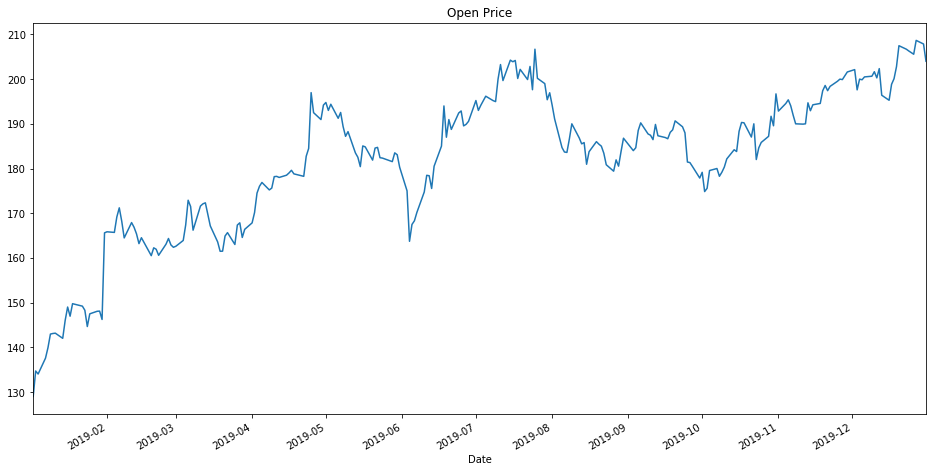

In [11]:
# Visualizing Facebook's Opening Price
facebook['Open'].plot(title='Open Price', figsize =(16,8));

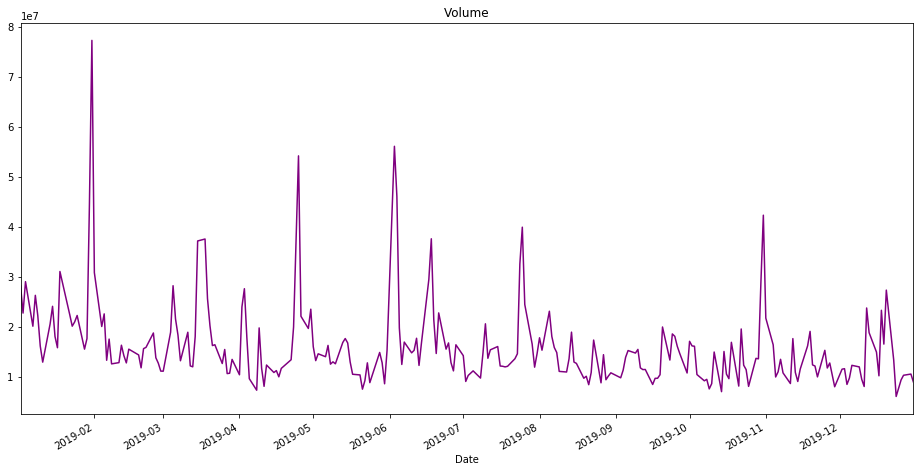

In [10]:
# Visualizing Facebook's Volume
facebook['Volume'].plot(title='Volume', figsize =(16,8), color = 'Purple');


Based on the graphs of the opening price of Facebook and the volume, both across time, it can be seen that at a given dates, there is an increase in the volume of the stock and there is a drastic stock change. Based on the plots, these occurred during the end of the fourth month, and the end of the fifth month, and the end of the first (this one seeing a greater change in the stock value and more trading). Thus, we can obtain the specific date of these days as well as their opening stock price that day.

In [46]:
# First Drastic Volume and Stock Change
print(np.argmax(facebook['Volume'].loc['2019-01-15 00:00:00':'2019-03-31 00:00:00']))
# Second Drastic Volume and Stock Change
print((np.argmax(facebook['Volume'].loc['2019-04-01 00:00:00':'2019-05-15 00:00:00'])))
# Third Drastic Volume and Stock Change
print((np.argmax(facebook['Volume'].loc['2019-05-15 00:00:00':'2019-06-15 00:00:00'])))

2019-01-31 00:00:00
2019-04-25 00:00:00
2019-06-03 00:00:00


In [47]:
# Now we can determine the opening price of their stock on that given dat
# First Opening Price of Stock 
print(facebook['Open'].loc['2019-01-31 00:00:00'])
# Second Opening Price of Stock
print(facebook['Open'].loc['2019-04-25 00:00:00'])
# Third Opening Price of Stock
print(facebook['Open'].loc['2019-06-03 00:00:00'])

165.60000610351562
196.97999572753906
175.0


Now that we've obtained the dates, we can do a quick Google Search to see what occurred that day that cause for the drastic change. By simply searching "Facebook 2019-01-31," the first news article reports on the tremendous fourth-quarter and year-end financial results. The article mentions how the quarterly revenues increased by 30% to nearly $17 billion dollars and the profits also saw an 61% growth. Website: https://fortune.com/2019/01/31/mark-zuckerberg-facebook-results-scandals/

For the second date (2019-04-25), we can also see that the rise of the volume in the stocks is given by a strong quarterly with a revenue of over $15 billion. Thus, based on the first two increases in volume and stock price, we can assume that strong financial statements help the price of the company's stock go up. Website: https://www.cnbc.com/2019/04/25/wall-street-analysts-loved-facebook-earnings-what-a-start-to-2019.html

In the third date (2019-06-03), instead of an increase, there was a sharp decrease in the value of the stock. Why? During this time, tech companies faced more pressured as there were reports that there would be probes on the big four tech companies, with Facebook reportedly seeing an inquiry from the Federal Trade Comission. Although this ocurred in the early stages, these could eventually lead up to fines, changed business practices, and in some cases, forced company breakups. As a result, these possible investigations were the reason as to why the company's stock sharply dropped. Website: https://www.cnbc.com/2019/06/03/apple-google-facebook-amazon-facing-potential-regulatory-scrutiny.html

#### However, should have people sold their stocks? 
Should have people been worried about the drop in the stock price? A possible way to analyze this is through moving averages, where the arithmetic mean of the stock over a couple of days could have been calculated. These are mainly helpful to eliminate outliers and demonstrate the general trends over time.

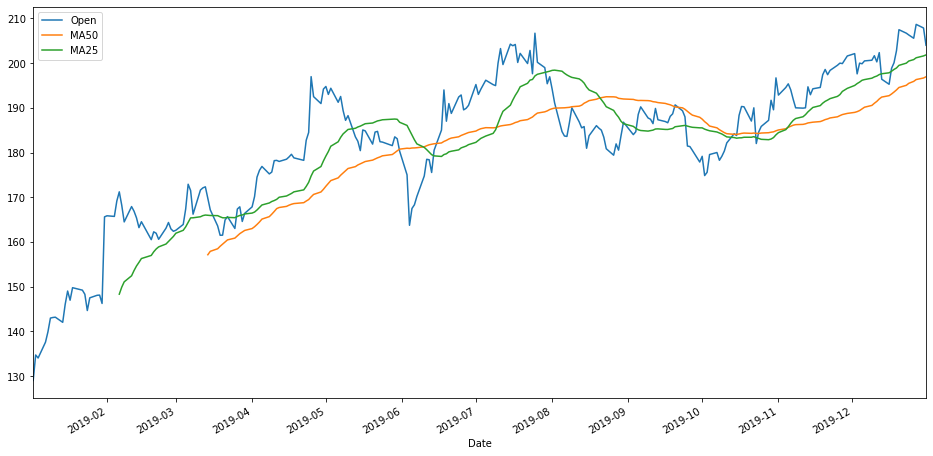

In [50]:
# Adding the Columns of Moving Averages to the Faceebook data
facebook['MA50'] = facebook['Open'].rolling(50).mean()
facebook['MA25'] = facebook['Open'].rolling(25).mean()
facebook[['Open','MA50','MA25']].plot(label='Facebook',figsize=(16,8))

As we can see through visualization of the moving averages, these show an upwards trend toward higher prices. As a result, investors should not have unloaded their stocks during that time as there was an overall trend that averages were increasing. In fact, if anything, other investors should have taken advantage of the drop to buy stocks!

### Walgreens Stock

In [52]:
# Downloading the stock information for Walgreens
walgreens = web.DataReader("WBA", 'yahoo', start, end)

In [53]:
# A simple check to see if it download correctly
walgreens.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,68.459999,66.690002,67.199997,68.040001,5528100.0,65.960114
2019-01-03,68.089996,66.720001,67.800003,67.330002,5853200.0,65.271805
2019-01-04,70.139999,68.000000,68.430000,69.570000,6868600.0,67.443344
2019-01-07,70.540001,68.820000,69.150002,69.970001,6192500.0,67.831108
2019-01-08,71.669998,70.139999,70.519997,71.370003,6548100.0,69.188316


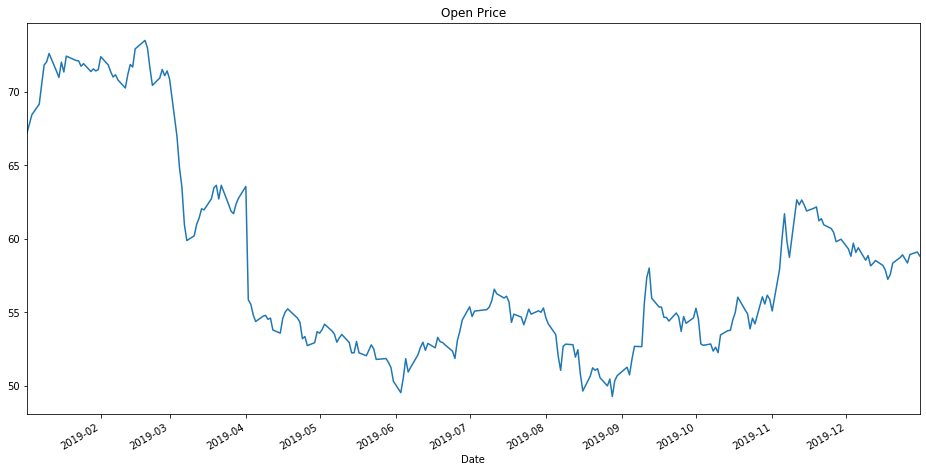

In [54]:
# Visualizing Walgreen's Opening Price
walgreens['Open'].plot(title='Open Price', figsize =(16,8));

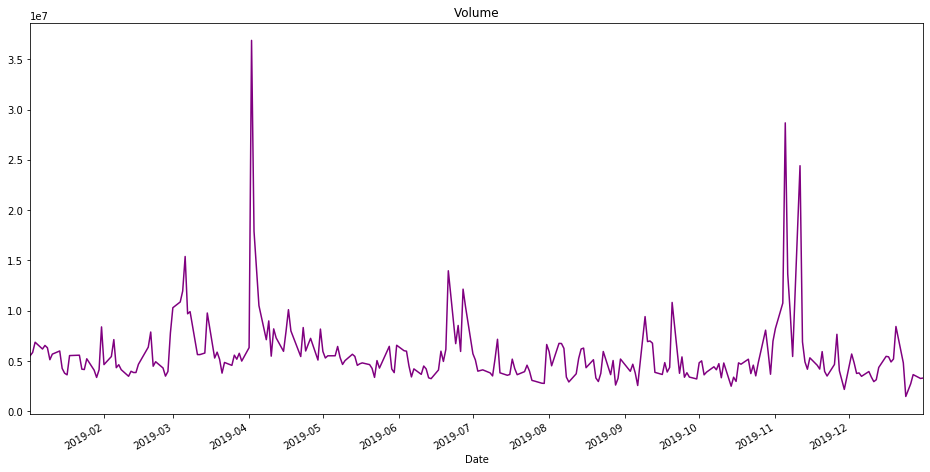

In [65]:
# Visualizing Walgreen's Volume
walgreens['Volume'].plot(title='Volume', figsize =(16,8), color = 'Purple');

Based on the visualization of data, we can clearly see that Walgreens' stock took a huge hit during the beginning of the second month, with another sharp decrease in the beginning of the fourth month. Nonetheless, it is important to note that its stock price has risen in the last quarter, with a drastic increase in the beginning of the eleventh month.  

In [62]:
# First Stock Change
# Note that for the first stock change, we use now its Open Price as there is not a relevant increase in the volume
print(np.argmin(walgreens['Open'].loc['2019-02-10 00:00:00':'2019-03-15 00:00:00']))
# Second Drastic Volume and Stock Change
print((np.argmax(walgreens['Volume'].loc['2019-03-20 00:00:00':'2019-04-15 00:00:00'])))
# Third Drastic Volume and Stock Change
print((np.argmax(walgreens['Volume'].loc['2019-11-01 00:00:00':'2019-11-15 00:00:00'])))

2019-03-08 00:00:00
2019-04-02 00:00:00
2019-11-05 00:00:00


In [63]:
# Now we can determine the opening price of their stock on that given date
# First Opening Price of Stock 
print(walgreens['Open'].loc['2019-03-08 00:00:00'])
# Second Opening Price of Stock
print(walgreens['Open'].loc['2019-04-02 00:00:00'])
# Third Opening Price of Stock
print(walgreens['Open'].loc['2019-11-05 00:00:00'])

59.869998931884766
55.84000015258789
59.9900016784668


With these dates, we can begin to try to identify as to why there were changes on the the stock's price. For 2019-03-08, the reason as to why this ocurred is the same as to why there was a drastic drop during 2019-04-02: weak fiscal records. The company had been underperforming with many of its financial statements showing a drop in adjusted earnings. This is mainly due to a company restructuring, where costs are being cut. Website:https://www.fool.com/investing/2019/05/09/why-walgreens-boots-alliance-stock-dropped-153-in.aspx 

However, it is also important to recognize that there was an increase in the last four months of 2019, especially in the eleventh. By googling Walgreens and 2019-11-05, we can clearly see as to why the stock had gone up: Walgreens considered going private. Walgreens had indicated that it would consider selling the company, which mostly results in the share price going up. As a result, it could easily for the price of the stock to increase. Website: https://www.cnn.com/2019/11/05/investing/walgreens-buyout-report-stock/index.html

#### One of the worst stocks: Potentially a good investment?
In short, although Walgreens had one of the worst stock perfomances, with a large decrease in its market price, it could potentially be a beneficial investment for individuals that could buy the stock right now, as the price may increase if Walgreens is to be bought.




### Part 2: Daily Percentage Change and Cumulative Daily Returns

The daily percentage indicates the percentage change of a stock from one day to another, or simply by how much did the stock price change in a day. Although the daily percentage change is not very helpful in predicting future values of stocks, it does help us identify a clear element of a stock: volatility. Volatility refers to the variation in trading prices of an investment. For example, if a stock is deemed volatile, it may be considered as a high-risk and high-reward investment. Investors who look for short-term profit may want to capitalize on the volatile of a stock, selling it when it is high. 

The formula for daily percentage change is defined as $ r_t = \frac{p_t}{p_{t-1}} -1$, where r_t is returns on investment at time t, p_t is the price of an investment at time t and p_t-1 is the price the previous day from t.

In order to compare the volatility of the two stocks, we will compare the distribution of these value, with the most volatile stock having the most distribution. However, we must first calculate the volatility of these two stocks! 


In [82]:
# Creating the Daily Percent Change column
facebook['Daily Percent'] = (facebook['Close'] / facebook['Close'].shift(1) ) - 1
walgreens['Daily Percent'] = (walgreens['Close'] / walgreens['Close'].shift(1) ) - 1

# Testing to see if the Column was added
facebook.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Percent
Date,,,,,,,
2019-01-02,137.509995,128.559998,128.990005,135.679993,28146200,135.679993,NaN
2019-01-03,137.169998,131.119995,134.690002,131.740005,22717900,131.740005,-0.029039
2019-01-04,138.000000,133.750000,134.009995,137.949997,29002100,137.949997,0.047138
2019-01-07,138.869995,135.910004,137.559998,138.050003,20089300,138.050003,0.000725
2019-01-08,143.139999,139.539993,139.889999,142.529999,26263800,142.529999,0.032452


##### There are multiple ways in which we can compare the daily percent of both companies; however, we will be using a histogram and density curve to show their comparison as this allows us to see much better their distribution. 

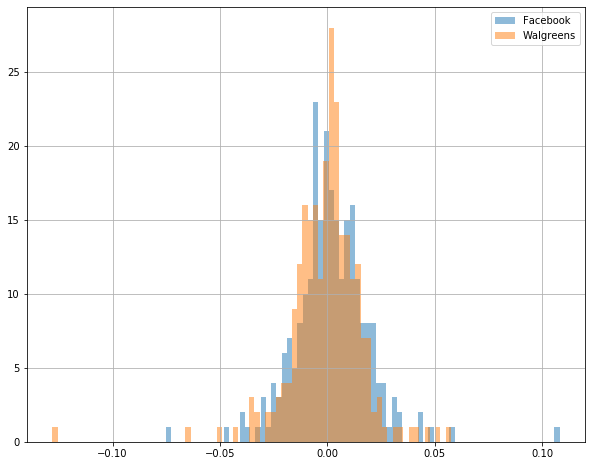

In [80]:
# Setting up the Histogram
facebook['Daily Percent'].hist(bins=75,label='Facebook',figsize=(10,8),alpha=0.5)
walgreens['Daily Percent'].hist(bins=75, label='Walgreens', figsize=(10,8), alpha=0.5)
plt.legend()

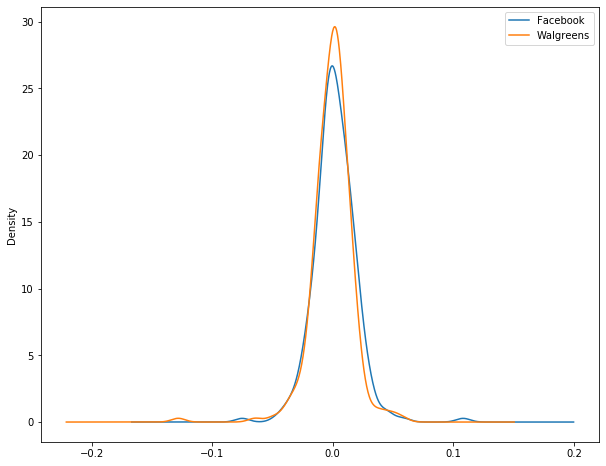

In [81]:
# Setting up the Density Curve
facebook['Daily Percent'].plot(kind='kde',label='Facebook',figsize=(10,8))
walgreens['Daily Percent'].plot(kind='kde', label='Walgreens')
plt.legend()


Based upon the histogram and density curve, it can be inferred that they had the same volatility as the shape of the distributions are mostly the same. If one would have had a greater volatility, then it would have been more wider on the sides and the peak would not be as high. However, it is important to note that the Facebook distribution is mostly shifted to the right and the Walgreens distribution is shifted to the left. As a result,  Walgreens had mostly negative daily percent change and Facebook had more positive daily percent change.

This leads us to Cumulative Daily Returns, which focuses more on the total change in the price of the investment over a set period. This focuses more on the profit over time rather than one day to the next. The formula of the Cumuluative Daily Returns is given by $ i_i = (1+r_t) * i_{t-1} $ 

In [84]:
# Creating the Cumulative Daily Return Column for each Companuy
facebook['Cumulative Return'] = (1 + facebook['Daily Percent']).cumprod()
walgreens['Cumulative Return'] = (1 + walgreens['Daily Percent']).cumprod()

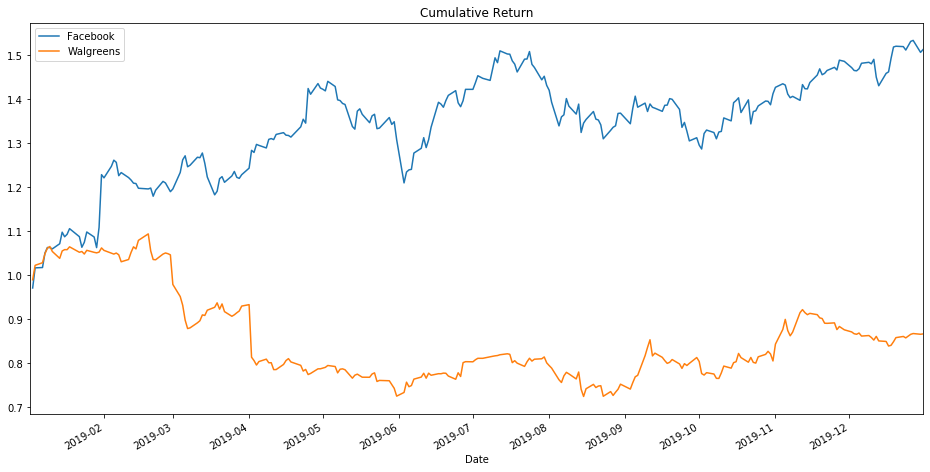

In [85]:
# Plotting the Cumulative Daily Return 
facebook['Cumulative Return'].plot(label='Facebook',figsize=(16,8),title='Cumulative Return')
walgreens['Cumulative Return'].plot(label='Walgreens')
plt.legend()

As we can see it would have been more profitable to invest on Facebook at the beginning of the year as it would have produces a much higher Cumulative Daily Return at the end of the year. As a result, we would consider Facebook stock as a long-term investment as it Cumulative Daily Return grows over time, while it wouldn't be wise to invest in Walgreens lont-term.